# Лабораторная работа 6
## Линейная Регрессия в sklearn
## Выполнил: 6133-010302D, Сергунин Станислав Константинович

####  0. Найти и загрузить датасет, подходящий для задачи регрессии. 

Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [ ]:
Имена столбцов говорят сами за себя(целочисленное количество эпизодов и подписчиков,имя и айди особо смысла не несут, жанр и тип категориальные,)

In [3]:
import numpy as np
import pandas as pd

In [22]:
anime = 'anime.csv'
rating = 'rating.csv'
df = pd.read_csv(anime)

In [23]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


#### 1. Временно удалить категориальные / бинарные признаки, оставив только вещественные

In [24]:
df = df.dropna(how='any',axis=0) 
df_new = df.drop(columns='name', axis=1)
df_new = df_new.drop(columns='genre', axis=1)
df_new = df_new.drop(columns='type', axis=1)
df_new = df_new.drop(columns='anime_id', axis=1)
df_new.head()

,episodes,rating,members
0,1,9.37,200630
1,64,9.26,793665
2,51,9.25,114262
3,24,9.17,673572
4,51,9.16,151266


#### 2. Визуализировать heatmap-матрицу кореллированности признаков.

In [25]:
import seaborn as sns

<AxesSubplot:>

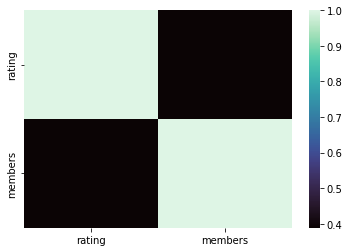

In [26]:
sns.heatmap(df_new.corr(), cmap = "mako")

#### 3. Визуализировать взаимосвязь между целевой переменной и каждым признаком 

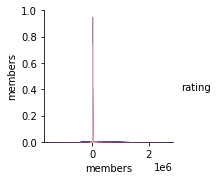

In [27]:
sns.pairplot(df_new, hue = "rating")

#### 4. Разделить набор данных на обучающую и тестовую выборки

In [28]:
from sklearn.model_selection import train_test_split

In [39]:
X = df_new.drop('rating', axis = 1)
Y = df_new.rating
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [41]:
X_train

,episodes,members
11632,4.0,1760
7895,1.0,188
12174,2.0,4732
713,12.0,359011
6357,2.0,16436
...,...,...
8471,1.0,121
2935,37.0,883
10428,2.0,72
6621,12.0,24338


#### 5. Линейная регрессия

In [42]:
from sklearn.linear_model import LinearRegression

##### 5.1 Обучить модель линейной регрессии (LinearRegression)

In [43]:
# обучение модели
model_regress = LinearRegression()
model_regress.fit(X_train, Y_train)
pred_train = model_regress.predict(X_train)
pred_test = model_regress.predict(X_test)

##### 5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
def metrics(pred_model, Y_data):
    mae = mean_absolute_error(Y_data, pred_model)
    mse = mean_squared_error(Y_data, pred_model)
    r2 = r2_score(Y_data, pred_model)
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('R2: ', r2)

In [46]:
print('метрики на обущающем наборе')
metrics(pred_train, Y_train)

метрики на обущающем наборе
MAE:  0.721365053880221
MSE:  0.875027185990157
R2:  0.15593665835122117


In [47]:
print('метрики на тестовом наборе')
metrics(pred_test, Y_test)

метрики на тестовом наборе
MAE:  0.737373031801669
MSE:  0.916825748359158
R2:  0.15291799320516009


##### 5.3 Вывести model.coef_ и model.intercept_

In [48]:
def intercept_coef(model):
    importance = model_regress.coef_
    print('coef: ', importance)
    intercept = model_regress.intercept_
    print('intercept: ', intercept)
    

In [49]:
intercept_coef(model_regress)

coef:  [1.61774791e-03 7.31967092e-06]
intercept:  6.321469333720918


##### 5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках 

Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси.

In [50]:
def barh_plot(model, X_data):
    attribute = X_data.columns.values
    importance = model.coef_
    list1 = np.vstack([importance, attribute]).T
    list2 = pd.DataFrame(data = {'importance': importance, 'attribute': X_data.columns, }).sort_values(by = 'importance')
    print(list2)
    sns.barplot(data = list2, y = 'attribute', x = 'importance')
    

   importance attribute
1    0.000007   members
0    0.001618  episodes


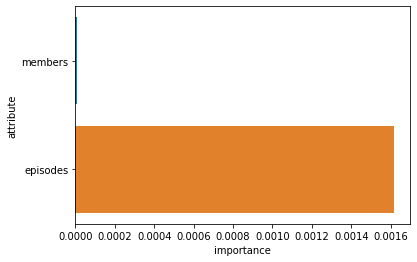

In [51]:
barh_plot(model_regress, X_train)

#### 6. Модель Lasso

In [52]:
from sklearn.linear_model import Lasso

##### 6.1 Обучить модель регрессии (Lasso), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
model_lasso = Lasso()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_lasso = GridSearchCV(model_lasso, parametrs, refit = True)
model_lasso.fit(X_train, Y_train)

print(model_lasso.best_params_)

{'alpha': 0.48000000000000004}


In [55]:
# обучение модели
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(X_train, Y_train)
pred_lasso_train = model_lasso.predict(X_train)
pred_lasso_test = model_lasso.predict(X_test)

##### 6.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [56]:
print('метрики на обущающем наборе')
metrics(pred_lasso_train, Y_train)

метрики на обущающем наборе
MAE:  0.7213721927646265
MSE:  0.8750272372230666
R2:  0.15593660893124694


In [57]:
print('метрики на тестовом наборе')
metrics(pred_lasso_test, Y_test)

метрики на тестовом наборе
MAE:  0.7373745105325332
MSE:  0.9168126491466079
R2:  0.15293009594908302


##### 6.3 Для лучшей модели вывести model.coef_ и model.intercept_

In [58]:
intercept_coef(model_lasso)

coef:  [1.61774791e-03 7.31967092e-06]
intercept:  6.321469333720918


##### 6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance attribute
1    0.000007   members
0    0.001613  episodes


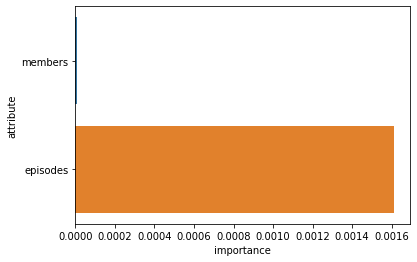

In [59]:
barh_plot(model_lasso, X_train)

#### 7. Модель Ridge

In [60]:
from sklearn.linear_model import Ridge

##### 7.1 Обучить модель регрессии (Ridge), с помощью GridSearchCV подобрать параметр alpha, дальше работаем с лучшей моделью

In [61]:
model_ridge = Ridge()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 100, 0.01)}
model_ridge = GridSearchCV(model_ridge, parametrs, refit = True)
model_ridge.fit(X_train, Y_train)

print(model_ridge.best_params_)

{'alpha': 99.99000000000001}


In [62]:
# обучение модели
model_ridge = Ridge(alpha = 0.04)
model_ridge.fit(X_train, Y_train)
pred_ridge_train = model_ridge.predict(X_train)
pred_ridge_test = model_ridge.predict(X_test)

##### 7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [63]:
print('метрики на обущающем наборе')
metrics(pred_ridge_train, Y_train)

метрики на обущающем наборе
MAE:  0.7213650538853225
MSE:  0.8750271859901569
R2:  0.15593665835122128


In [64]:
print('метрики на тестовом наборе')
metrics(pred_ridge_test, Y_test)

метрики на тестовом наборе
MAE:  0.7373730318027298
MSE:  0.9168257483497108
R2:  0.15291799321388866


##### 7.3 Для лучшей модели вывести model.coef и model.intercept

In [65]:
intercept_coef(model_ridge)

coef:  [1.61774791e-03 7.31967092e-06]
intercept:  6.321469333720918


##### 7.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance attribute
1    0.000007   members
0    0.001618  episodes


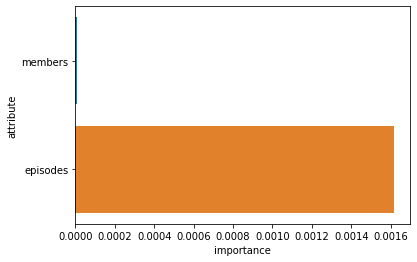

In [66]:
barh_plot(model_ridge, X_train)

#### 8. Модель ElasticNet

In [67]:
from sklearn.linear_model import ElasticNet

##### 8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

In [68]:
model_elastic = ElasticNet()

# подбираем параметры
parametrs = {"alpha": np.arange(0.01, 1, 0.01), "l1_ratio": np.arange(0.01, 1, 0.01)}

model_elastic = GridSearchCV(model_elastic, parametrs, refit = True)
model_elastic.fit(X_train, Y_train)

print(model_elastic.best_params_)

{'alpha': 0.98, 'l1_ratio': 0.49}


In [69]:
# обучение модели
model_elastic = ElasticNet(alpha = 0.01, l1_ratio = 0.99)
model_elastic.fit(X_train, Y_train)
pred_elastic_train = model_elastic.predict(X_train)
pred_elastic_test = model_elastic.predict(X_test)

##### 8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

In [70]:
print('метрики на обущающем наборе')
metrics(pred_elastic_train, Y_train)

метрики на обущающем наборе
MAE:  0.7213721213901506
MSE:  0.8750272362051625
R2:  0.1559366099131314


In [71]:
print('метрики на тестовом наборе')
metrics(pred_elastic_test, Y_test)

метрики на тестовом наборе
MAE:  0.7373744957689737
MSE:  0.916812779186123
R2:  0.15292997580178824


##### 8.3 Для лучшей модели вывести model.coef и model.intercept

In [72]:
intercept_coef(model_elastic)

coef:  [1.61774791e-03 7.31967092e-06]
intercept:  6.321469333720918


##### 8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

   importance attribute
1    0.000007   members
0    0.001613  episodes


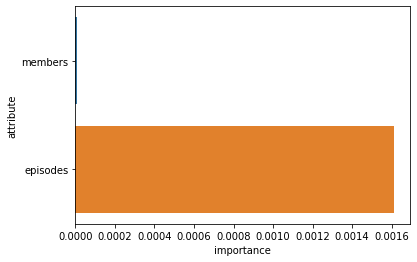

In [73]:
barh_plot(model_elastic, X_train)

#### 9. Возвращаем категориальные / бинарные признаки на место в датасет.

Категориальные признаки преобразуем в набор бинарных через pd.get_dummies( ..., drop_first = True ). Обучаем лучшую модель.

In [74]:
from pandas import get_dummies

In [77]:
df = df.dropna(how='any',axis=0) 
df_full = get_dummies(df, drop_first = True)
df_full.drop(columns = 'rating', inplace = True)
df_full.head()

,anime_id,members,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,name_&quot;Eiyuu&quot; Kaitai,name_.hack//G.U. Returner,name_.hack//G.U. Trilogy,...,episodes_91,episodes_92,episodes_93,episodes_94,episodes_95,episodes_96,episodes_97,episodes_98,episodes_99,episodes_Unknown
0,32281,200630,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,793665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,114262,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,673572,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,151266,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X = df_full.drop('members', axis = 1)
#Y = df_new.Rings
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 25)

In [79]:
model_best = Lasso(alpha = 0.01)
model_best.fit(X_train, Y_train)
pred_best_test = model_best.predict(X_test)

#### 10. Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

In [80]:
print('метрики на тестовом наборе')
metrics(pred_best_test, Y_test)

метрики на тестовом наборе
MAE:  0.7275914132051446
MSE:  0.870778531145648
R2:  0.19546235807967027


Значения метрик MAE и MSE улучшились, но незначительно 

#### 11. Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, обучаем найденную на предыдущих шагах лучшую модель. 

Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы.

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
X_new_train = scaler.fit_transform(X_train)
X_new_test = scaler.fit_transform(X_test)

In [83]:
model_scaler = Lasso(alpha = 0.01)
model_scaler.fit(X_new_train, Y_train)
pred_scaler_test = model_scaler.predict(X_new_test)

print('метрики на тестовом наборе')
metrics(pred_scaler_test, Y_test)

метрики на тестовом наборе
MAE:  0.6733975468803539
MSE:  0.7595987882682897
R2:  0.2981845600684756


Значение метрики R2 стало меньше. Значение метрики MAE незначительно улучшилось. MSE напротив увеличилось

#### 13. Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

In [84]:
X_scaler = pd.DataFrame(X_new_train, columns = X_train.columns)
X_scaler.head()

,anime_id,"name_&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",name_&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,name_&quot;Bungaku Shoujo&quot; Memoire,name_&quot;Bungaku Shoujo&quot; Movie,name_&quot;Eiji&quot;,name_&quot;Eiyuu&quot; Kaitai,name_.hack//G.U. Returner,name_.hack//G.U. Trilogy,name_.hack//G.U. Trilogy: Parody Mode,...,episodes_91,episodes_92,episodes_93,episodes_94,episodes_95,episodes_96,episodes_97,episodes_98,episodes_99,episodes_Unknown
0,-1.095498,-0.010534,-0.010534,-0.010534,0.0,-0.010534,-0.010534,-0.010534,0.0,-0.010534,...,-0.010534,-0.010534,-0.010534,-0.014899,-0.014899,-0.021072,-0.018248,0.0,-0.010534,-0.126979
1,1.465727,-0.010534,-0.010534,-0.010534,0.0,-0.010534,-0.010534,-0.010534,0.0,-0.010534,...,-0.010534,-0.010534,-0.010534,-0.014899,-0.014899,-0.021072,-0.018248,0.0,-0.010534,-0.126979
2,-0.999490,-0.010534,-0.010534,-0.010534,0.0,-0.010534,-0.010534,-0.010534,0.0,-0.010534,...,-0.010534,-0.010534,-0.010534,-0.014899,-0.014899,-0.021072,-0.018248,0.0,-0.010534,-0.126979
3,0.411961,-0.010534,-0.010534,-0.010534,0.0,-0.010534,-0.010534,-0.010534,0.0,-0.010534,...,-0.010534,-0.010534,-0.010534,-0.014899,-0.014899,-0.021072,-0.018248,0.0,-0.010534,-0.126979
4,-1.045127,-0.010534,-0.010534,-0.010534,0.0,-0.010534,-0.010534,-0.010534,0.0,-0.010534,...,-0.010534,-0.010534,-0.010534,-0.014899,-0.014899,-0.021072,-0.018248,0.0,-0.010534,-0.126979


       importance                                          attribute
14350   -0.174206                                     genre_Dementia
0       -0.134763                                           anime_id
15243   -0.117512                                         type_Music
13672   -0.112974                                       genre_Comedy
15244   -0.111797                                           type_ONA
...           ...                                                ...
15334    0.034727                                        episodes_25
13823    0.036279               genre_Comedy, Drama, Shounen, Sports
12541    0.042712  genre_Action, Comedy, Historical, Parody, Samu...
13374    0.054622  genre_Adventure, Comedy, Mystery, Police, Shounen
15247    0.138262                                            type_TV

[15434 rows x 2 columns]


C:\Users\stass\mambaforge\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\stass\mambaforge\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0, flags=flags)


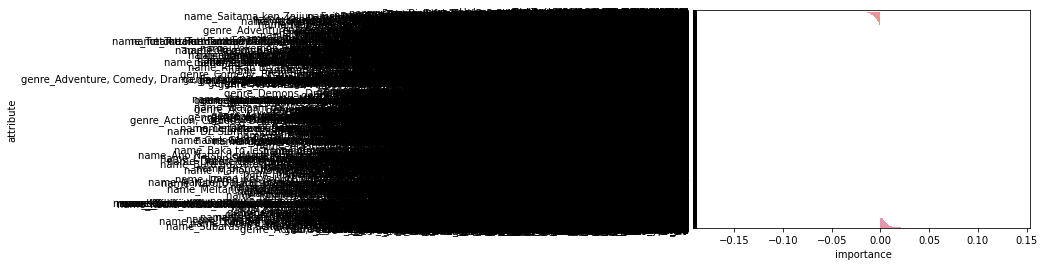

In [85]:
barh_plot(model_scaler, X_scaler)